<a href="https://colab.research.google.com/github/erikkmelo/Censo-2022-EDA/blob/main/EDA_Censo_2022_BASICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Agregados por setores - BÁSICO

In [8]:
def show_csv_info(file_path, encoding='UTF-8', sep=';', n_rows=5):
    """
    Carrega um arquivo CSV, exibe informações básicas do DataFrame e as primeiras linhas.

    Args:
        file_path (str): Caminho para o arquivo CSV.
        encoding (str): Codificação do arquivo. Padrão é 'UTF-8'.
        sep (str): Separador usado no arquivo CSV. Padrão é ';'.
        n_rows (int): Número de linhas a serem exibidas do DataFrame. Padrão é 5.
    """
    try:
        # Carregar o CSV
        df = pd.read_csv(file_path, encoding=encoding, sep=sep)

        # Mostrar informações básicas
        print("Informações do DataFrame:")
        print("-" * 40)
        df.info()
        print("\nPrimeiras linhas do DataFrame:")
        print("-" * 40)
        print(df.head(n_rows))
        return df
    except Exception as e:
        print(f"Erro ao carregar o arquivo: {e}")

# 1° Passo - Criar uma pasta com o código do municipio (opcional).
1. Para o endereço dos arquivos ficar nesse formato. p.ex. /content/3551009/Agregados_por_setores_basico_3551009.csv
Salvar os arquivos do Censo 2022 para serem analisados (se o colab estiver automatizado)

2. Ou pode salvar o arquivo em qualquer lugar e colocar o endereço do arquivo na variável file_path

In [11]:
# Colocar o csv do básico já filtrado para o município, caso ainda não tenha feito tem esse
# Colab aqui faz a filtragem para o município: https://colab.research.google.com/drive/1Ir_WhPR1N457e9cMIABWxg9QbCGYLxGC#scrollTo=UrE-4dr3KsV9


file_path = '/content/3551009/Agregados_por_setores_basico_3551009.csv' #colocar o endereço do arquivo csv BÁSICO
df = show_csv_info(file_path)

Informações do DataFrame:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_SETOR    672 non-null    int64  
 1   SITUACAO    671 non-null    object 
 2   CD_SIT      672 non-null    int64  
 3   CD_TIPO     672 non-null    int64  
 4   AREA_KM2    672 non-null    object 
 5   CD_REGIAO   672 non-null    int64  
 6   NM_REGIAO   672 non-null    object 
 7   CD_UF       672 non-null    int64  
 8   NM_UF       672 non-null    object 
 9   CD_MUN      672 non-null    int64  
 10  NM_MUN      672 non-null    object 
 11  CD_DIST     672 non-null    int64  
 12  NM_DIST     672 non-null    object 
 13  CD_SUBDIST  672 non-null    int64  
 14  NM_SUBDIST  0 non-null      float64
 15  CD_BAIRRO   672 non-null    object 
 16  NM_BAIRRO   663 non-null    object 
 17  CD_NU       672 non-null    object 
 18  NM_

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

CD_SETOR        0
SITUACAO        1
CD_SIT          0
CD_TIPO         0
AREA_KM2        0
CD_REGIAO       0
NM_REGIAO       0
CD_UF           0
NM_UF           0
CD_MUN          0
NM_MUN          0
CD_DIST         0
NM_DIST         0
CD_SUBDIST      0
NM_SUBDIST    672
CD_BAIRRO       0
NM_BAIRRO       9
CD_NU           0
NM_NU         496
CD_FCU          0
NM_FCU        504
CD_AGLOM        0
NM_AGLOM      671
CD_RGINT        0
NM_RGINT        0
CD_RGI          0
NM_RGI          0
CD_CONCURB      0
NM_CONCURB      0
v0001           0
v0002           0
v0003           0
v0004           0
v0005           0
v0006           0
v0007           0
dtype: int64


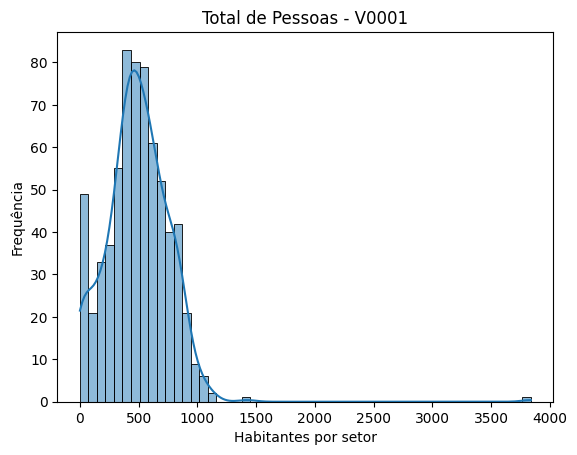

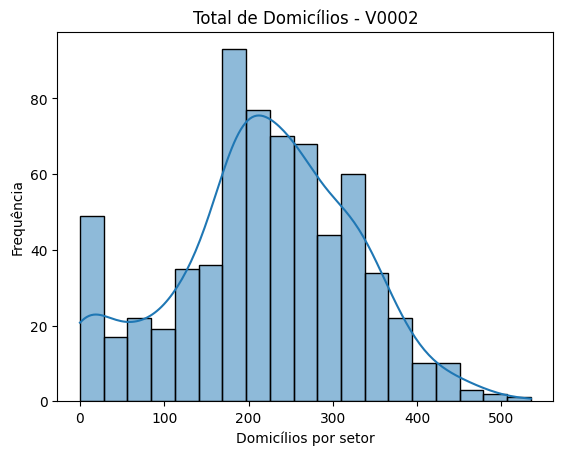

In [13]:
sns.histplot(df['v0001'], kde=True)
plt.title('Total de Pessoas - V0001')
plt.xlabel('Habitantes por setor')
plt.ylabel('Frequência')
plt.show()

sns.histplot(df['v0002'], kde=True)
plt.title('Total de Domicílios - V0002')
plt.xlabel('Domicílios por setor')
plt.ylabel('Frequência')
plt.show()

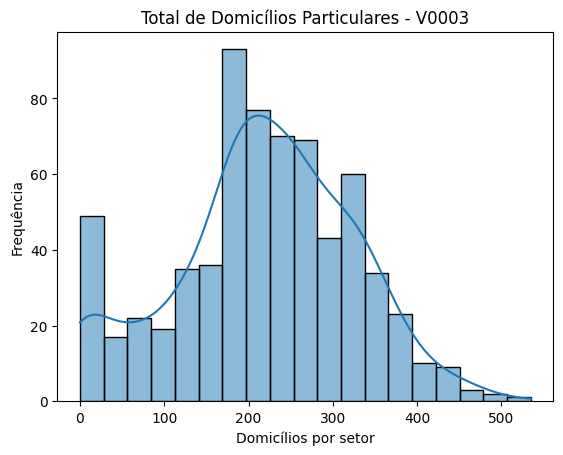

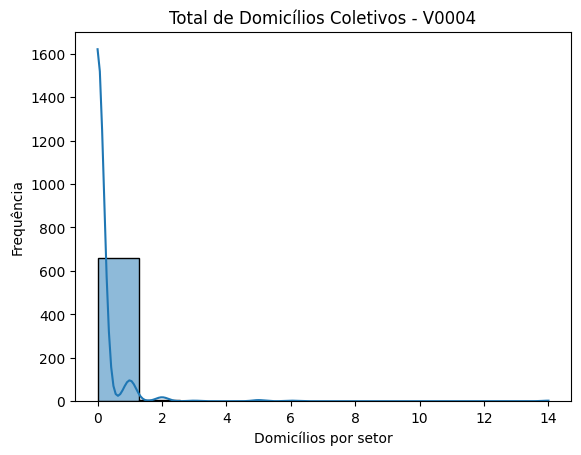

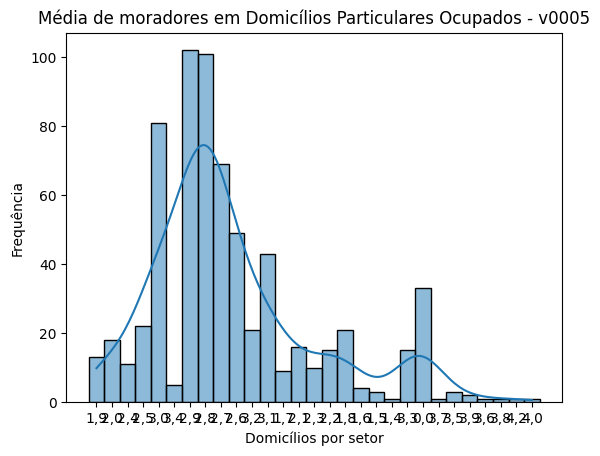

In [14]:
sns.histplot(df['v0003'], kde=True)
plt.title('Total de Domicílios Particulares - V0003')
plt.xlabel('Domicílios por setor')
plt.ylabel('Frequência')
plt.show()

sns.histplot(df['v0004'], kde=True)
plt.title('Total de Domicílios Coletivos - V0004')
plt.xlabel('Domicílios por setor')
plt.ylabel('Frequência')
plt.show()

sns.histplot(df['v0005'], kde=True)
plt.title('Média de moradores em Domicílios Particulares Ocupados - v0005')
plt.xlabel('Domicílios por setor')
plt.ylabel('Frequência')
plt.show()

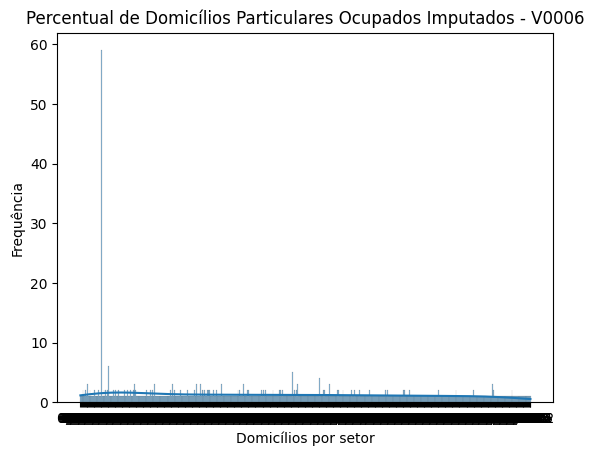

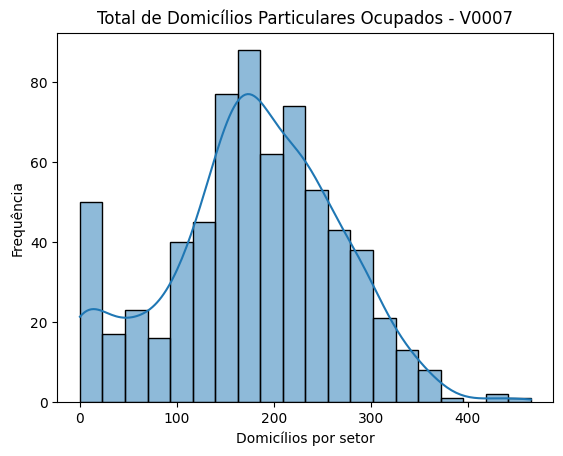

In [15]:
sns.histplot(df['v0006'], kde=True)
plt.title('Percentual de Domicílios Particulares Ocupados Imputados - V0006')
plt.xlabel('Domicílios por setor')
plt.ylabel('Frequência')
plt.show()

sns.histplot(df['v0007'], kde=True)
plt.title('Total de Domicílios Particulares Ocupados - V0007')
plt.xlabel('Domicílios por setor')
plt.ylabel('Frequência')
plt.show()

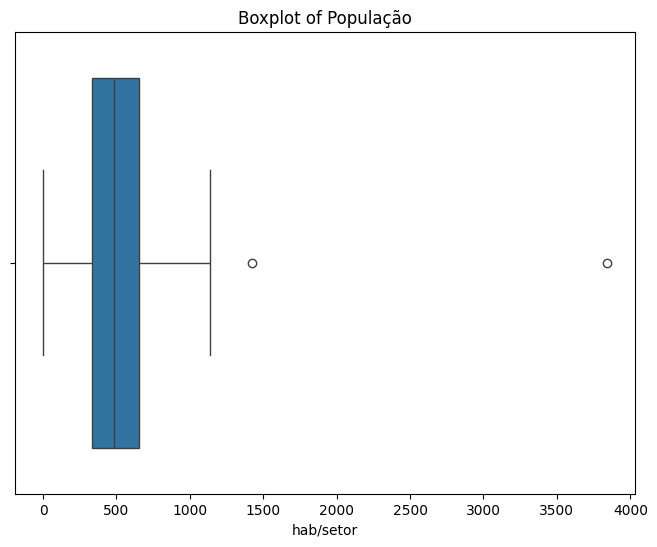

In [16]:
# Boxplot of 'adr'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['v0001'])
plt.title('Boxplot of População')
plt.xlabel('hab/setor')
plt.show()

In [17]:
# Calculate Z-scores
df['pop_zscore'] = np.abs(stats.zscore(df['v0001']))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[df['pop_zscore'] > threshold]
print(f'Number of outliers in População: {outliers.shape[0]}')

# Remove outliers
df = df[df['pop_zscore'] <= threshold]

Number of outliers in População: 2


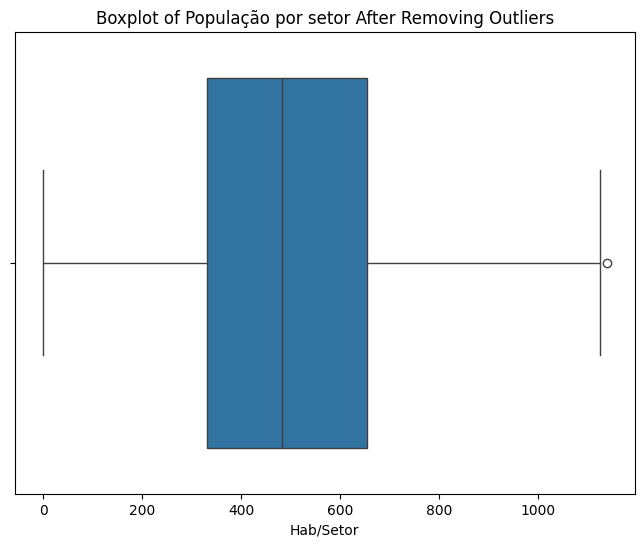

In [18]:
# Boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['v0001'])
plt.title('Boxplot of População por setor After Removing Outliers')
plt.xlabel('Hab/Setor')
plt.show()

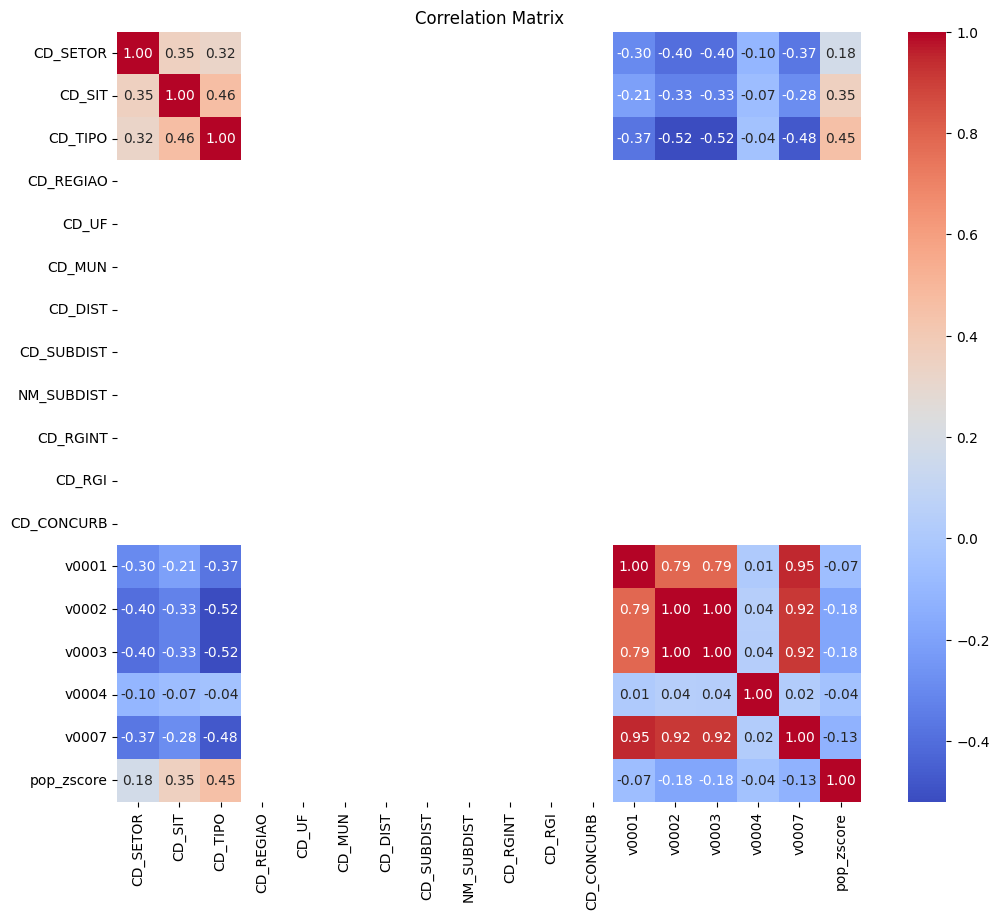

In [19]:
# Select only numerical columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

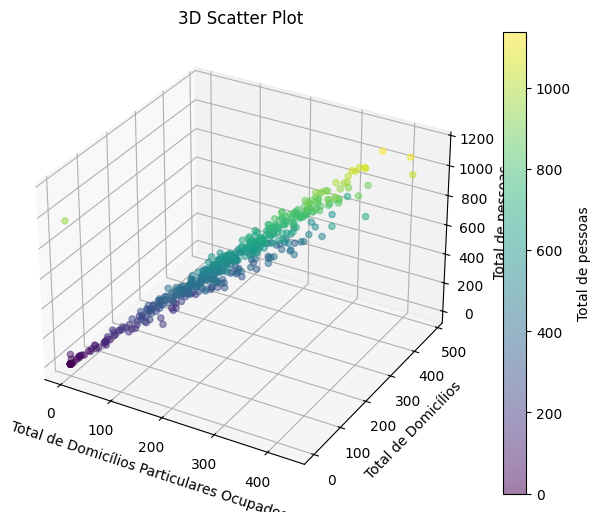

In [20]:
# Prepare data
subset = df.sample(500)  # Sample for visualization
X = subset['v0007']
Y = subset['v0002']
Z = subset['v0001']

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('Total de Domicílios Particulares Ocupados')
ax.set_ylabel('Total de Domicílios')
ax.set_zlabel('Total de pessoas')
plt.title('3D Scatter Plot')
fig.colorbar(scatter, ax=ax, label='Total de pessoas')
plt.show()

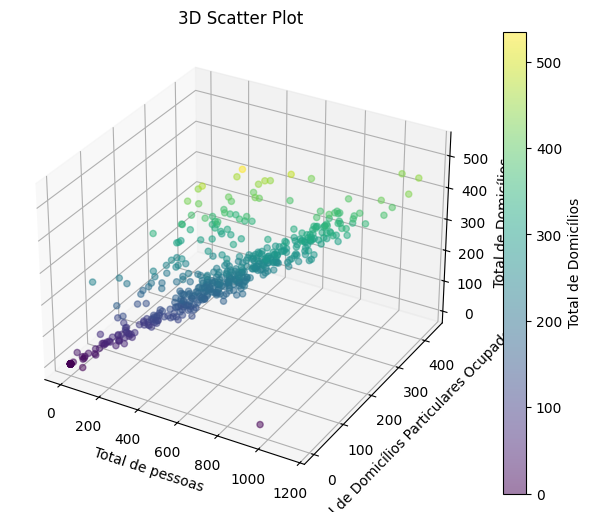

In [21]:
# Prepare data
subset = df.sample(500)  # Sample for visualization
X = subset['v0001']
Y = subset['v0007']
Z = subset['v0002']

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('Total de pessoas')
ax.set_ylabel('Total de Domicílios Particulares Ocupados')
ax.set_zlabel('Total de Domicílios')
plt.title('3D Scatter Plot')
fig.colorbar(scatter, ax=ax, label='Total de Domicílios')
plt.show()


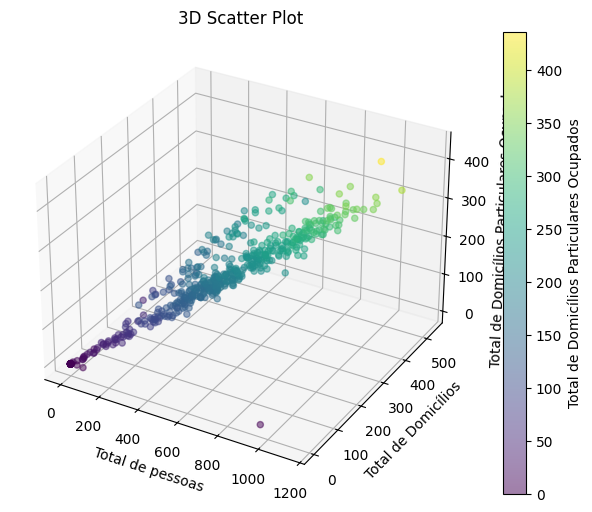

In [22]:
# Prepare data
subset = df.sample(500)  # Sample for visualization
X = subset['v0001']
Y = subset['v0002']
Z = subset['v0007']

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('Total de pessoas')
ax.set_ylabel('Total de Domicílios')
ax.set_zlabel('Total de Domicílios Particulares Ocupados')
plt.title('3D Scatter Plot')
fig.colorbar(scatter, ax=ax, label='Total de Domicílios Particulares Ocupados')
plt.show()

# Conclusões
1. Fazendo esse grafico em 3d com a troca dos eixos foi interessante notar que dependendo do escolha dos eixos algumas conclusões podem estar equivocadas.
2. Foi interessante notar que tem um setor muito fora dos eixos, e fui verificar e é uma unidade prisional, o que faz muito sentido pois tem uma alta população e poucos domicílios.
3. Dá pra notar uma tendência, e que tem alguns pontos fora, e criando uma nova coluna de taxa de ocupação dos setores foi possível verificar os setores que estão com quase a totalidade dos domicílios ocupados. E no caso de São Vicente os maiores graus de desocupação são na parte turística da orla da praia, que são destinados a turismo.
4.